<a href="https://colab.research.google.com/github/raz0208/Agritech-Pest-Prediction/blob/main/Agritech_Pest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model implementation: Classification Problem

In [ ]:
# import rewuired libraries for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression and Decision Tree classification

In [ ]:
# Copy dataset to nw dataframe
df = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Load the dataset
X = df.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["New Catches"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_clf
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled if name == "Logistic Regression" else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name == "Logistic Regression" else X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.50      0.40      0.44         5

    accuracy                           0.84        31
   macro avg       0.69      0.66      0.68        31
weighted avg       0.83      0.84      0.83        31

Decision Tree Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.50      0.40      0.44         5

    accuracy                           0.84        31
   macro avg       0.69      0.66      0.68        31
weighted avg       0.83      0.84      0.83        31



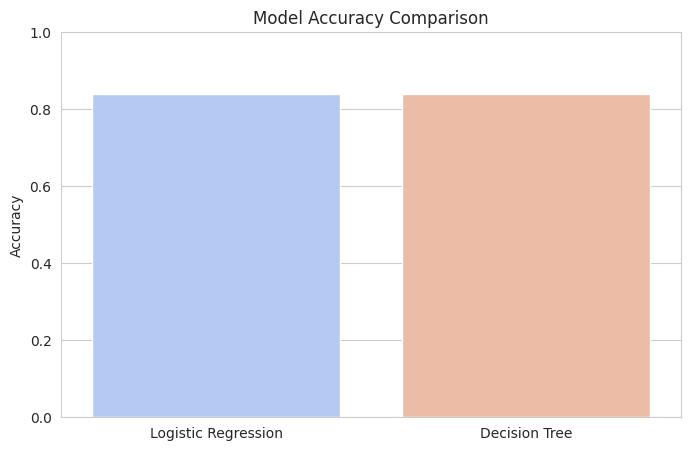

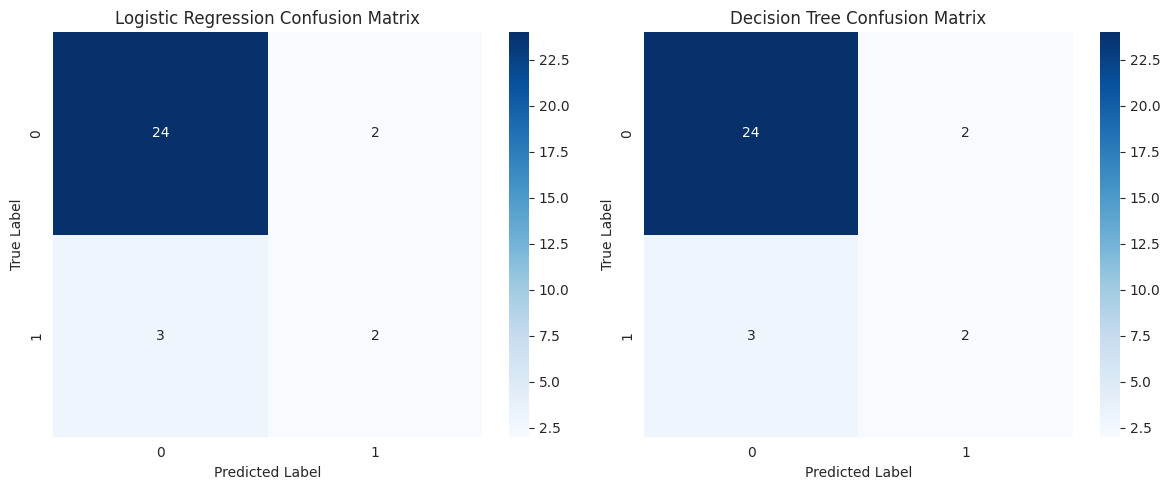

In [ ]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False, hue=models.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print("\n")
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Random Forest and Gradient Boosting classifiers, including XGBoost, LightGBM, and CatBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

In [ ]:
# Copy dataset to nw dataframe
df = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Load the dataset (assuming 'df' is already preprocessed)
X = df.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["New Catches"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
# lgb_clf = LGBMClassifier(n_estimators=100, random_state=42)
# cat_clf = CatBoostClassifier(n_estimators=100, verbose=0, random_state=42)

models = {
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "XGBoost": xgb_clf,
    # "LightGBM": lgb_clf,
    # "CatBoost": cat_clf
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7742
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg       0.41      0.46      0.44        31
weighted avg       0.69      0.77      0.73        31

Gradient Boosting Accuracy: 0.9032
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        26
         1.0       0.67      0.80      0.73         5

    accuracy                           0.90        31
   macro avg       0.81      0.86      0.83        31
weighted avg       0.91      0.90      0.91        31



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [0. 1. 2. 4.]

In [ ]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False, hue=models.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\n")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Neural Networks (MLP Classifier)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Copy dataset to nw dataframe
df = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Load the dataset (assuming 'df' is already preprocessed)
X = df.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y = df["New Catches"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svm_clf = SVC(kernel='rbf', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

models = {
    "Support Vector Machine": svm_clf,
    "K-Nearest Neighbors": knn_clf,
    "Neural Network (MLP)": mlp_clf
}

results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled if name in ["Support Vector Machine", "Neural Network (MLP)"] else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name in ["Support Vector Machine", "Neural Network (MLP)"] else X_test)
    predictions[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

In [ ]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False, hue=models.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\n")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

## Model Impelementaion: Time Series Analysis

In [ ]:
# Required libararies for Time Series Forcasting models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

In [ ]:
# Load dataset
TS_df = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Convert Date column to datetime
TS_df["Date"] = pd.to_datetime(TS_df["Date"])  # Convert Date column to datetime
TS_df.set_index("Date", inplace=True)  # Set Date as index
TS_df = TS_df.sort_index()  # Ensure data is sorted by time

# Plot Time Series
plt.figure(figsize=(12, 5))
plt.plot(TS_df.index, TS_df["Number of Insects"], label="Number of Insects")
plt.xlabel("Date")
plt.ylabel("Insect Count")
plt.title("Time Series Plot of Insect Counts")
plt.legend()
plt.show()

print("\n")

# Seasonal Decomposition
decomposition = seasonal_decompose(TS_df["Number of Insects"], model='additive', period=30)  # Adjust period based on data
decomposition.plot()
plt.show()

print("\n")

# ACF and PACF Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(TS_df["Number of Insects"], ax=axes[0], lags=50)
plot_pacf(TS_df["Number of Insects"], ax=axes[1], lags=50)
plt.show()

print("\n")

# Fourier Transform (Spectral Analysis)
fft_vals = np.fft.fft(TS_df["Number of Insects"])
frequencies = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_vals[:len(frequencies)//2]))
plt.title("Fourier Transform - Frequency Domain Analysis")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Augmented Dickey-Fuller (ADF) Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

print("Augmented Dickey-Fuller Test:")
adf_test(TS_df["Number of Insects"])

print("\n")

# Seasonal-Trend Decomposition using LOESS (STL)
period = 5  # Adjust based on your time series frequency
stl = STL(df["Number of Insects"], period=period)
result = stl.fit()

# Plot STL decomposition
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
result.trend.plot(ax=axes[0], title="Trend")
result.seasonal.plot(ax=axes[1], title="Seasonality")
result.resid.plot(ax=axes[2], title="Residuals")
plt.tight_layout()
plt.show()

### Regression Models with Time-Based Features
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest
- Gradient Boosting

In [ ]:
# Load dataset
Time_df = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Convert Date column to datetime
Time_df["Date"] = pd.to_datetime(Time_df["Date"])  # Convert Date to datetime
Time_df["Time"] = pd.to_datetime(Time_df["Time"], format='%H:%M:%S').dt.hour  # Convert Time to numeric (hour of the day)
Time_df["Year"] = Time_df["Date"].dt.year
Time_df["Month"] = Time_df["Date"].dt.month
Time_df["Day"] = Time_df["Date"].dt.day
Time_df["Weekday"] = Time_df["Date"].dt.weekday

# Drop original Date column
X = Time_df.drop(columns=["Number of Insects", "Date", "Location"])  # Drop target and non-numeric columns
y = Time_df["Number of Insects"]

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mae, mse, r2)
    print(f"{name} Results:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}\n")

In [ ]:
# Visualization of Predictions vs Actual
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    axes[i].set_title(f"{name}: Predictions vs Actual")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

In [ ]:
# Visualization of Model Performance
models_list = list(results.keys())
mae_values = [results[m][0] for m in models_list]
mse_values = [results[m][1] for m in models_list]
r2_values = [results[m][2] for m in models_list]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=models_list, y=mae_values, ax=axes[0], palette="Blues", legend=False, hue=models.keys())
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=mse_values, ax=axes[1], palette="Greens", legend=False, hue=models.keys())
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=models_list, y=r2_values, ax=axes[2], palette="Reds", legend=False, hue=models.keys())
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()